## Observations and Insights

1.) Capomulin and Ramicane proved to be the most effective drug regimens for regulating the tumor volumes in the test mice.
2.) Capomulin and Ramicane were also the most utilized drugs for number of data points during the testing period.
3.) All of the other drugs other than Capomulin and Ramicane performed only nominally or even less effective than the placebo for treating the tumor volumes in the test mice.


## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_mergedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

mouse_mergedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Store the Average,Median, Variance, and Standard Deviations of the Tumor Volume Data Grouped by Drug and Timepoint

 

mean_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().round(2)
median_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].median().round(2)
var_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().round(2)
stdev_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().round(2)
std_error_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().round(2)




combined= pd.DataFrame({"Mean": mean_volume, "Median": median_volume, "Variance":var_tumor_volume ,"Standard Deviation" : stdev_tumor_volume, "SEM" : std_error_tumor_volume})

combined

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

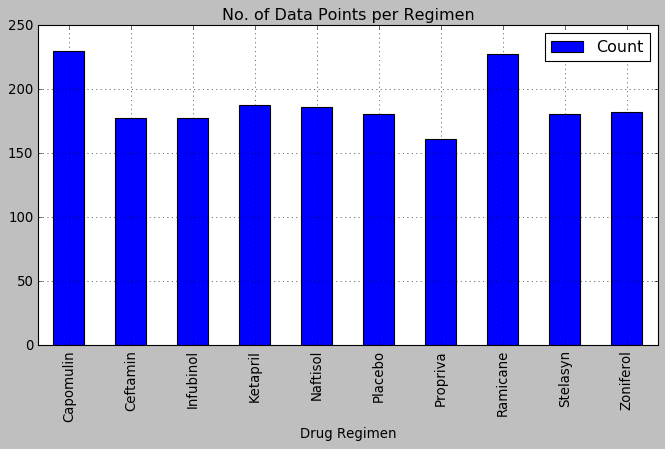

In [8]:

# Generate a bar plot showing the number of data points for each treatment regimen using pandas
grouped_datadf = pd.DataFrame(mouse_mergedf.groupby(["Drug Regimen"]).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
regimen_datapointsdf = grouped_datadf[["Drug Regimen","Mouse ID"]]
regimen_datapointsdf = regimen_datapointsdf.rename(columns={"Mouse ID": "Count"})

# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapointsdf = regimen_datapointsdf.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapointsdf.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("No. of Data Points per Regimen")
plt.style.use('classic')
plt.grid(zorder=0)
plt.show()

Text(0.5, 1.0, 'No. of Data Points per Regimen')

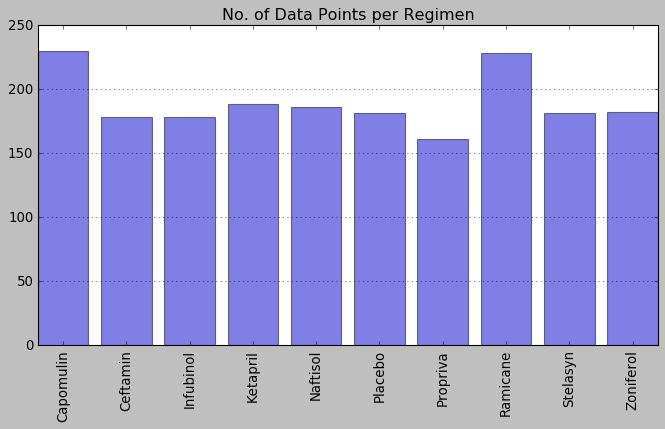

In [9]:
# Generate a bar plot showing the number of data points for each treatment regimen using pyplot
regimens = combined.index.tolist()
regimen_ct = (mouse_mergedf.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(regimen_ct))
# Define the x-axis
x_axis = regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,5))
plt.bar(x_axis, regimen_ct, color='mediumblue', alpha=0.5, align="center")
plt.grid(b=None, which='major', axis='y')
plt.xticks(rotation=90)



plt.title('No. of Data Points per Regimen')

## Pie plots

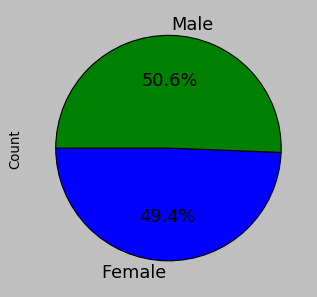

In [10]:


# Generate a pie plot showing the distribution of female versus male mice using pandas
genders_df = pd.DataFrame(mouse_mergedf.groupby(["Sex"]).count()).reset_index()


# Filter the DataFrame down only to those columns wanting to  chart
genders_df = genders_df[["Sex","Mouse ID"]]
genders_df = genders_df.rename(columns={"Mouse ID": "Count"})

# plot the chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
genders_df.plot.pie(y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=genders_df['Sex'], legend = False, fontsize=16)


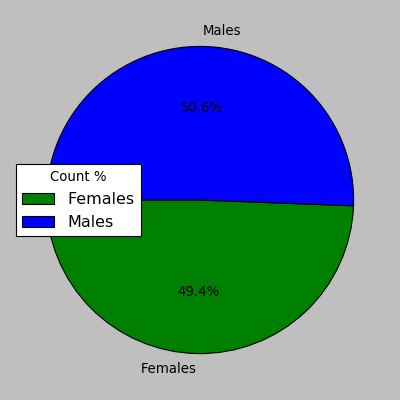

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_femaledf= (mouse_mergedf.groupby(["Sex"])["Mouse ID"].count())

labels = ["Females", "Males"]

colors = ["green", "blue"]

plt.pie(male_femaledf, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.legend(title="Count %",
           loc=6)


## Quartiles, outliers and boxplots

In [5]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers.

maximum_df = mouse_mergedf.groupby(["Mouse ID"])
max_time = maximum_df.max()
capdrug_data_df = max_time.loc[max_time["Drug Regimen"] == "Capomulin", :]

capdrug_sizes = capdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
capdrug_sizes = capdrug_sizes["Tumor Volume (mm3)"]
capdrug_sizes

Mouse ID
y793    45.000000
b742    45.000000
f966    45.000000
w150    45.000000
s710    45.000000
s185    45.000000
m601    45.000000
x401    45.473753
i738    45.595685
b128    45.651331
v923    45.704434
r554    45.781746
w914    45.893720
l897    46.154737
g288    46.304003
j246    46.408361
m957    46.414518
r157    46.539206
t565    46.749006
g316    46.809225
u364    47.212200
r944    47.373423
i557    47.685963
l509    48.070452
j119    48.158209
Name: Tumor Volume (mm3), dtype: float64

In [6]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = capdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 45.0
The upper quartile of the volumes is: 46.74900552
The interquartile range of the volumes is: 1.7490055199999972
The the median of the volumes is: 45.89372032 
Values that are below 42.376491720000004 could be outliers.
Values that are above 49.37251379999999 could be outliers.


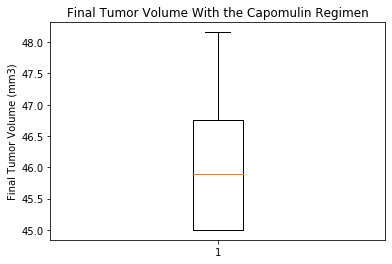

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capdrug_sizes)
plt.show()

In [8]:
# List the final tumor volumes
maximum_df = mouse_mergedf.groupby(["Mouse ID"])
max_time = maximum_df.max()
ramdrug_data_df = max_time.loc[max_time["Drug Regimen"] == "Ramicane", :]
ramdrug_sizes = ramdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
ramdrug_sizes = ramdrug_sizes["Tumor Volume (mm3)"]
ramdrug_sizes

Mouse ID
z578    45.000000
a444    45.000000
a520    45.000000
w678    45.000000
s508    45.000000
m546    45.000000
d251    45.000000
k403    45.000000
i177    45.000000
i334    45.000000
j913    45.252534
a411    45.466677
n364    45.521875
r921    45.568211
r811    45.625802
c458    45.722279
q597    45.766111
g791    45.851531
j989    46.343832
y449    46.378092
e662    46.409084
q610    46.585433
a644    46.910892
c758    46.940945
u196    47.622816
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 45.0
The upper quartile of the volumes is: 46.34383237
The interquartile range of the volumes is: 1.3438323700000012
The the median of the volumes is: 45.52187471 
Values that are below 42.984251445 could be outliers.
Values that are above 48.359580925 could be outliers.


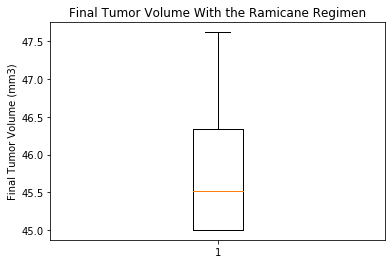

In [10]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramdrug_sizes)
plt.show()

In [15]:
# List the Final Tumor Volumes
maximum_df = mouse_mergedf.groupby(["Mouse ID"])
max_time = maximum_df.max()
infdrug_data_df = max_time.loc[max_time["Drug Regimen"] == "Infubinol", :]
infdrug_sizes = infdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
infdrug_sizes = infdrug_sizes["Tumor Volume (mm3)"]
infdrug_sizes

Mouse ID
c326    45.000000
o813    45.699331
v339    46.250112
m756    47.010364
w193    50.005138
v766    51.542431
v719    54.048608
q132    54.656549
o809    55.629428
s121    55.650681
a577    57.031862
w584    58.268442
n671    60.165180
f345    60.918767
c895    60.969711
k804    62.117279
e476    62.435404
z581    62.754451
a251    65.525743
a685    66.083066
k483    66.196912
i386    67.289621
y163    67.685569
a203    67.973419
c139    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 54.04860769
The upper quartile of the volumes is: 65.52574285
The interquartile range of the volumes is: 11.477135160000003
The the median of the volumes is: 60.16518046 
Values that are below 36.83290494999999 could be outliers.
Values that are above 82.74144559000001 could be outliers.


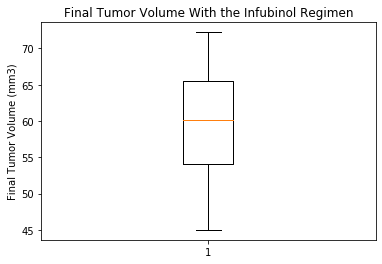

In [17]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infdrug_sizes)
plt.show()

In [20]:
# List the final tumor volumes
maximum_df = mouse_mergedf.groupby(["Mouse ID"])
max_time = maximum_df.max()
cefdrug_data_df = max_time.loc[max_time["Drug Regimen"] == "Ceftamin", :]

cefdrug_sizes = cefdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
cefdrug_sizes = cefdrug_sizes["Tumor Volume (mm3)"]
cefdrug_sizes

Mouse ID
x226    45.000000
b447    45.000000
u153    45.000000
t573    45.000000
l558    46.784535
h531    47.784682
f436    48.722078
u149    52.925348
b759    55.742829
b487    56.057749
l490    57.918381
o287    59.741901
l661    59.851956
x822    61.386660
p438    61.433892
j296    61.849023
a275    62.999356
q483    64.192341
l733    64.299830
x581    64.634949
y865    64.729837
w151    67.527482
l471    67.748662
y769    68.594745
k210    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cefdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 48.72207785
The upper quartile of the volumes is: 64.29983003
The interquartile range of the volumes is: 15.577752179999997
The the median of the volumes is: 59.85195552 
Values that are below 25.355449580000002 could be outliers.
Values that are above 87.66645829999999 could be outliers.


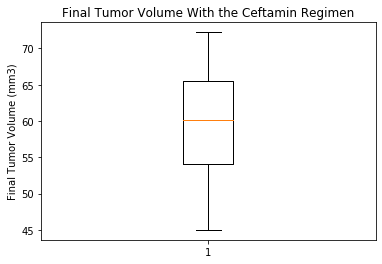

In [22]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infdrug_sizes)
plt.show()

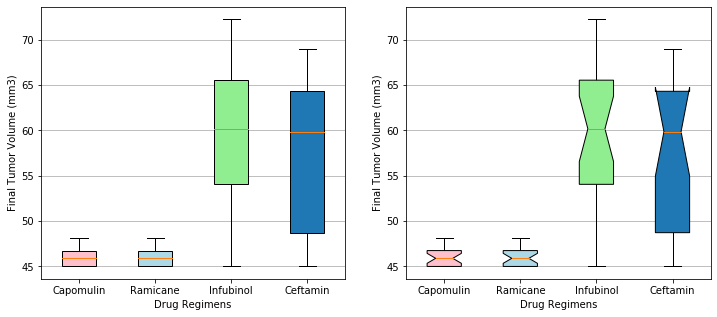

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

import matplotlib.pyplot as plt
import numpy as np

# Input drug data

all_data = [capdrug_sizes, ramdrug_sizes, infdrug_sizes, cefdrug_sizes]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('Drug Regimens')
    ax.set_ylabel('Final Tumor Volume (mm3)')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and scatter plots

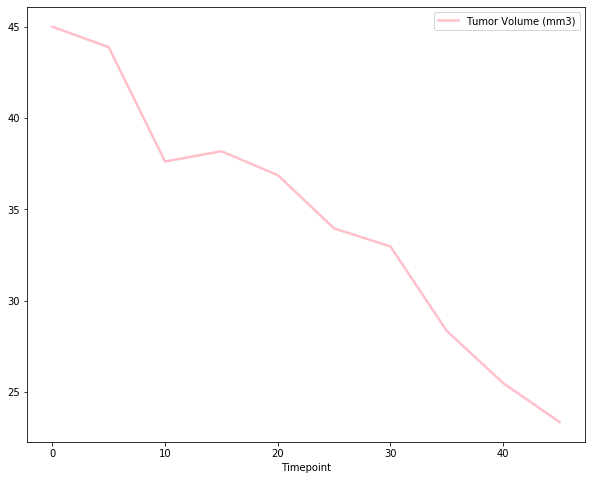

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import pandas as pd
# Create a new DataFrame that looks into Capomulin
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Merge the mouse and drug data
mouse_mergedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
capomulin_df = mouse_mergedf.loc[mouse_mergedf["Drug Regimen"] == "Capomulin"]
cap_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]


# Select the 2 columns needed
cap_mouse_df = cap_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='pink')

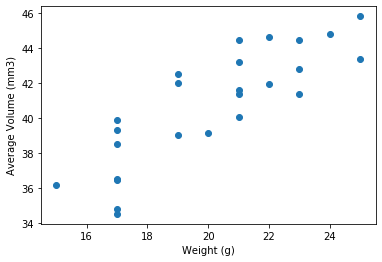

In [25]:
# Generate a scatter plot of the mouse weight versus average tumor volume for the Capomulin regimen
cap_df = mouse_mergedf.loc[mouse_mergedf["Drug Regimen"] == "Capomulin"]


avg_cap = pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index() 
# Rename  the Tumor Volume column
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

# Set the 'Mouse ID' as the index
avg_cap = avg_cap.set_index('Mouse ID')



# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = avg_cap['Weight (g)']
y_values = avg_cap["Average Volume"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

In [27]:
# Calculate the correlation coefficient and linear regression model for the mouse weight and average tumor volume for the Capomulin regimen

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Calculate the correlation coefficient between the mouse weight and the average tumor volume for the Capomulin regimen

mouse_weight = avg_cap.iloc[:,0]
avg_tumor_volume = avg_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
correlation

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


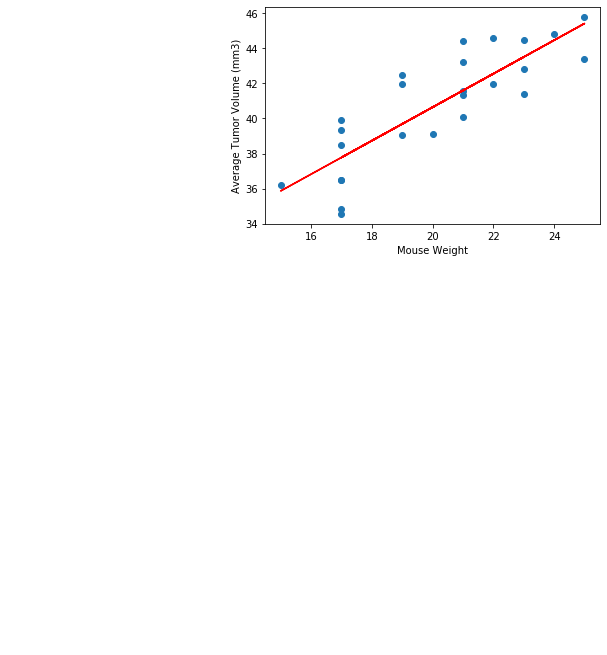

In [28]:

# Add the linear regression equation and line to plot
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()